Slight modification of standard ray trace to generate initial reusable set of 500 launch rays of a solid angle of pi/9, phase = 0, polarization along the +x direction, and shiftable source.

Mira Liu 
08/14/2019

In [4]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time

In [5]:

'''Same as above but with initial phase of zero instead of random and < lim (solid angle in radians) launch angle. '''
def makerays_Zero_narrow(sourcepointorigin,sourcethet,r,n,lim):
    sourcepoints = specsource(r,sourcepointorigin,sourcethet,n) # SOURCE
    Rays = FSRay_Zero_narrow(n,sourcepoints, sourcethet,origin10,lim)
    return Rays
'''Givin initial rays, just change source (set shift of source point) keeping everything else identical '''
def makerays_Zero_narrow_SetShift(sourcepoint,Rays): 
    spT = [sourcepoint[0],sourcepoint[1],sourcepoint[2]]
    for i in range(len(Rays)): 
        Rays[i][2] = spT
    return Rays
        

'''Simulation of interference of probability function of a single photon. 500 rays with initial phase of zero from a single source point, random launch points, and power is summed before squared. To show Chamberlain loss (large etendue) '''
def RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo,lim,Rays):
    n = 500
    r = 0
    thetG = [0,0,0]
    #Rays = makeraysVERTICAL(spo,r,n) 
    #Rays = makerays_Zero_narrow(spo,thetG,r,n,lim) #lim is solid angle wanted in radians
    #jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    #Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    DETECTOR = [] #added to capture final points on detector
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #all rays that made it to the detector
        #Overlap = gaussoverlap(OutRays[0],OutRays[5],3.3) #two paths that hit two different spots 
        #for j in range(len(Pix)): #per PIXEL
        P = [] #final points on detector.
        for j in range(1): #no pixels
            Ex4i = 0 #adding PER PIXEL from parts of RAYS in this PIXEL
            Ey4i = 0 #THIS IS WHERE THEY WILL INTERFERE
            for i in range(len(OutRays)): #per ray IN THIS PIXEL
                I = OutRays[i][1] #amplitude
                thet = OutRays[i][0] #polarization
                phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #e^ix2pi/lambda, x = distance traveleld
                Ex1 = np.sqrt(I)*np.cos(thet) #polarization
                Ey1 = np.sqrt(I)*np.sin(thet)
                Ex = Ex1*phase #phase
                Ey = Ey1*phase
                #doing summation over entire detector
                #sig,mux,muy = MakeGaussian(OutRays[i],Lamd)
                #Gr = Airygaussian3dNORM(Pix[j][0],Pix[j][1],sig,mux,muy)
                Gr = 1
                Ex4i = Ex4i + Gr*Ex #add electric fields of all rays
                Ey4i = Ey4i + Gr*Ey
                P.append(OutRays[i][2]) #spot on detector.
            PTot = PTot + (Ex4i*Ex4i.conjugate()).real + (Ey4i*Ey4i.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
        DETECTOR.append(P)
    return Delay,Ij,DETECTOR

def drawcircle(h,k,r):
    x = np.linspace(h-r, h+r, 100)
    ypos = []
    yneg = []
    for i in range(100):
        ypos.append(k + np.sqrt(r**2 - (x[i]-h)**2))
        yneg.append(k - np.sqrt(r**2 - (x[i]-h)**2))
    return x,ypos,yneg


# running with different launch points, corrected to flip polarization by pi at every intersection, all same initial rays launched for all simulations, initial polarization horizontal along x axis (0 degrees theta in local coordinates launching vertically along z axis in x-y plane)

### remember Ray = [theta, I, p, V, D]; theta is polarization angle, I is intensity... so theta = 0, I = 1, Ex = sqrt(I)cos(0) = 1, as expected.



In [6]:
n = 500
r = 0
thetG = [0,0,0]
lim =np.pi/9
spo = [1,1,1] # arbitrary
Lamd =2.089
Nsize = Nsized(Lamd)
Freq = float(300/Lamd)
Rays1 = makerays_Zero_narrow(spo,thetG,r,n,lim) # initial set of rays
xdet,ydetpos,ydetneg = drawcircle(160.375, -113, 7.9375) #detector 

# X displacement

began:  2019-08-15 15:16:01
CURRENTLY RUNNING...
44 Ray
COMPLETED
total time: ~ 461.13769270181655 mins


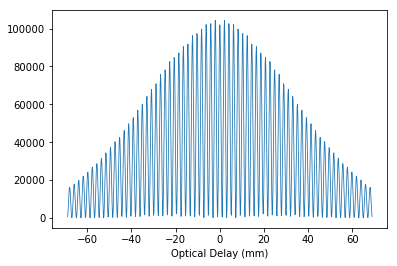

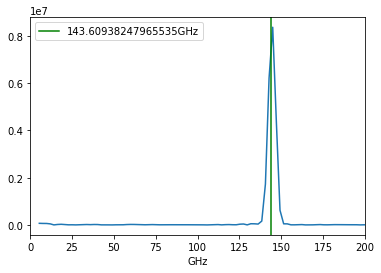

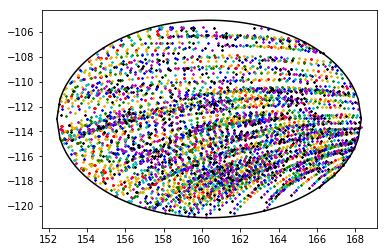

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.,-80.0] #global CENTERED
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('44 Ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_44.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_44.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_44.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-15 23:03:12
CURRENTLY RUNNING...
43 ray
COMPLETED
total time: ~ 238.13644085327783 mins


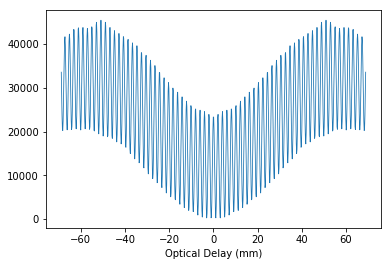

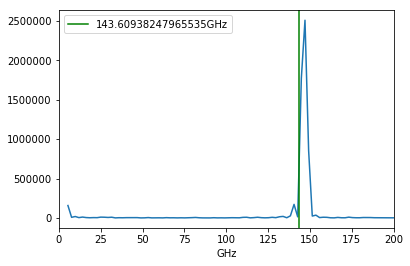

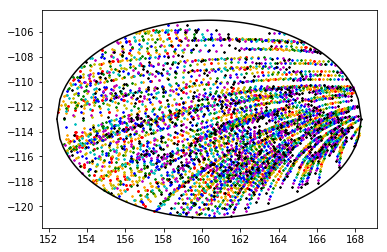

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375-2.5,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('43 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_43.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_43.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_43.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-16 03:07:58
CURRENTLY RUNNING...
42 ray
COMPLETED
total time: ~ 234.3842612306277 mins


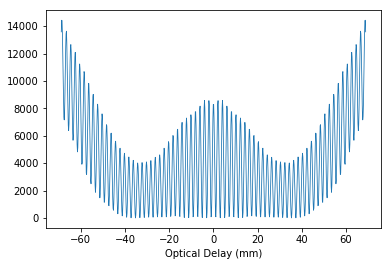

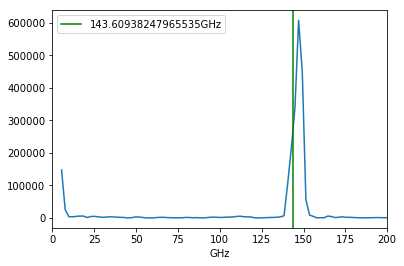

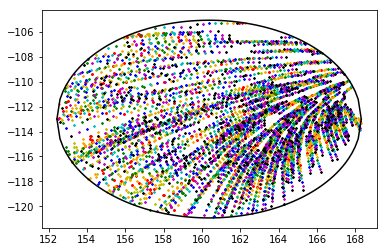

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375-5,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('42 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_42.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_42.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_42.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-16 07:09:25
CURRENTLY RUNNING...
41 ray
COMPLETED
total time: ~ 217.74236919879914 mins


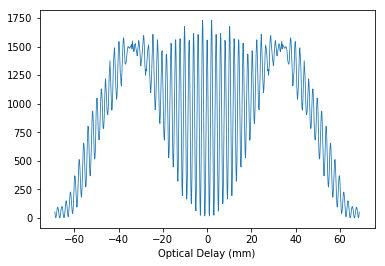

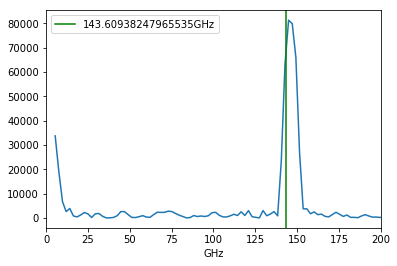

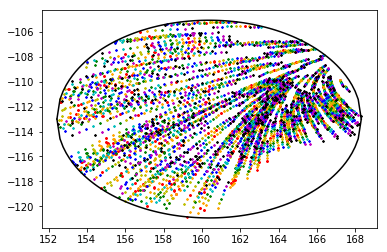

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375-7.5,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('41 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_41.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_41.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_41.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-16 10:52:18
CURRENTLY RUNNING...
40 ray
COMPLETED
total time: ~ 350.98644986152647 mins


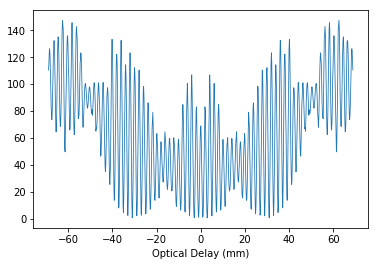

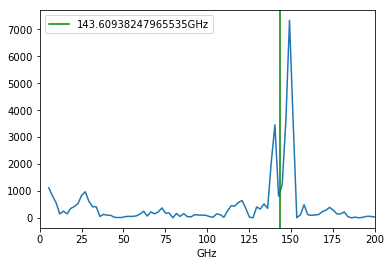

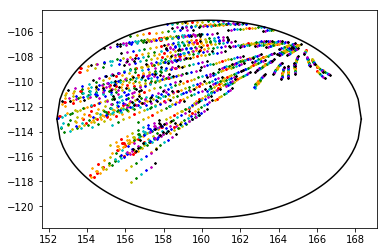

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375-10.,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('40 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_40.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_40.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_40.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-16 16:44:34
CURRENTLY RUNNING...
45 ray
COMPLETED
total time: ~ 268.42500678698224 mins


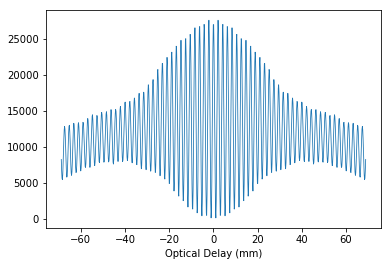

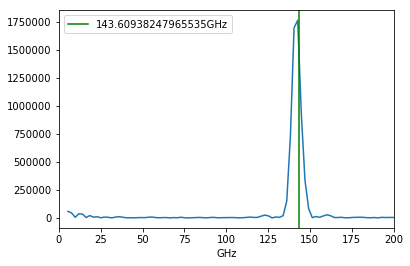

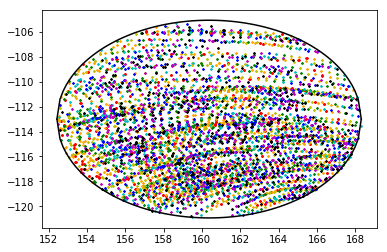

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375+2.5,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('45 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_45.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_45.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_45.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-16 21:18:30
CURRENTLY RUNNING...
46 ray
COMPLETED
total time: ~ 229.83573761781057 mins


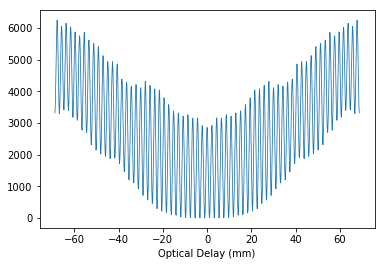

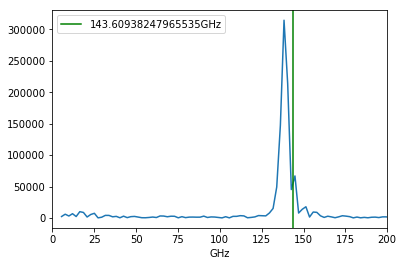

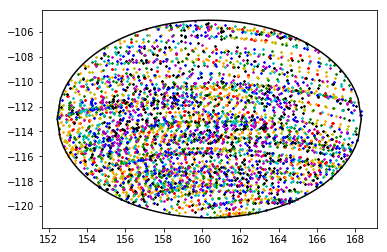

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375+5.,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('46 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_46.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_46.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_46.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 01:12:50
CURRENTLY RUNNING...
47 ray
COMPLETED
total time: ~ 183.5088094353676 mins


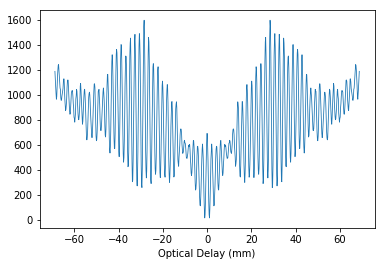

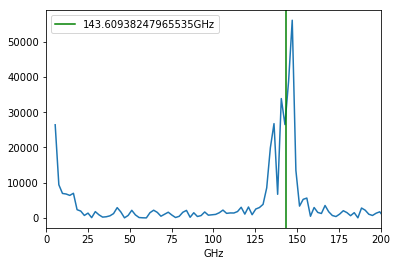

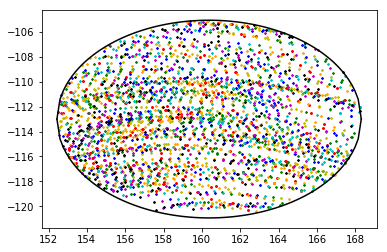

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375+7.5,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('47 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_47.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_47.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_47.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 04:18:34
CURRENTLY RUNNING...
48 ray
COMPLETED
total time: ~ 104.30585339864095 mins


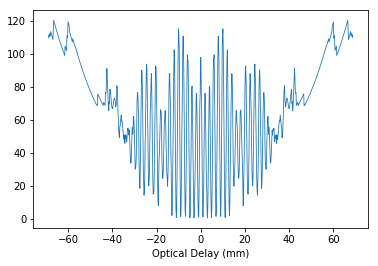

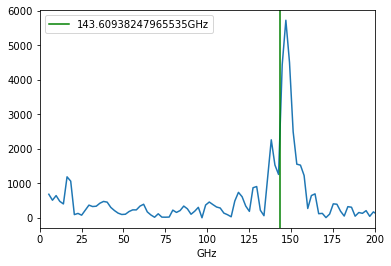

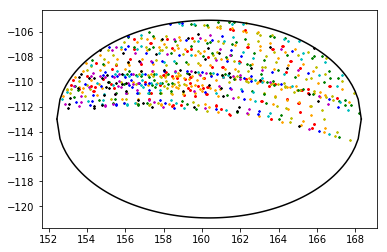

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.] #EDGE?
spo2 = [-160.375+10,-113.,-80.0] # moved in x plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
print('48 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)


Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_48.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_48.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_x"+str(spo2[0])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_48.pkl", "wb") as F:
    pickle.dump(DET,F)
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

# Y displacement

began:  2019-08-17 06:03:10
CURRENTLY RUNNING...
54 ray
COMPLETED
total time: ~ 249.69147764841716 mins


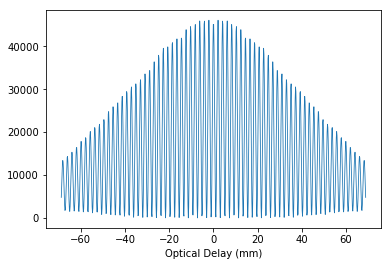

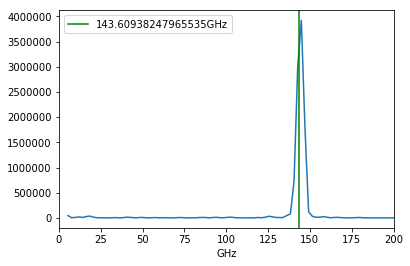

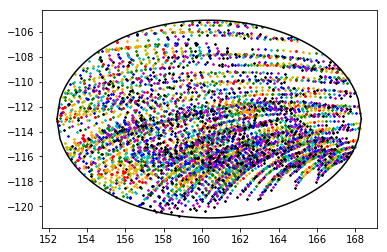

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.-2.5,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('54 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_54.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_54.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_54.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 10:19:44
CURRENTLY RUNNING...
64 ray
COMPLETED
total time: ~ 212.3958292722702 mins


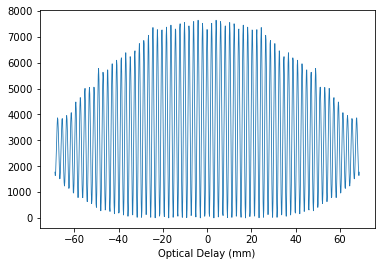

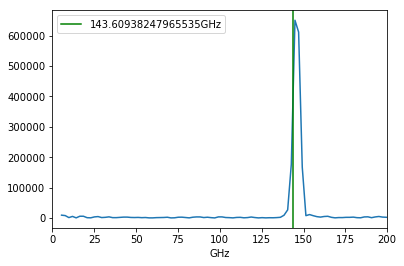

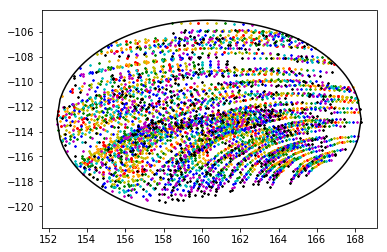

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.-5,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('64 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_64.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_64.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_64.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 13:57:19
CURRENTLY RUNNING...
74 ray
COMPLETED
total time: ~ 177.3256458679835 mins


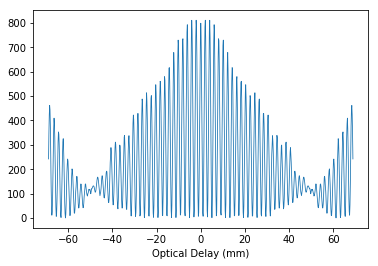

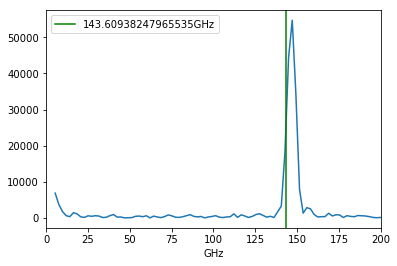

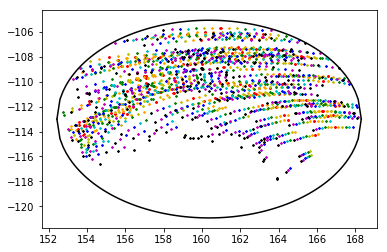

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.-7.5,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('74 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_74.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_74.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_74.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 16:55:30
CURRENTLY RUNNING...
84 ray
COMPLETED
total time: ~ 102.68732076088587 mins


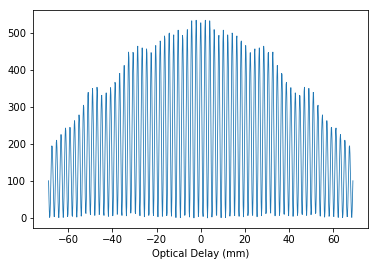

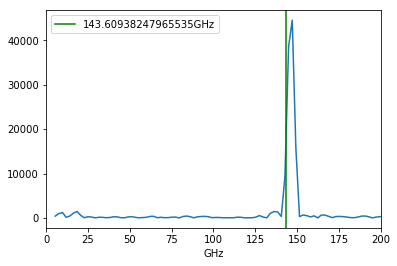

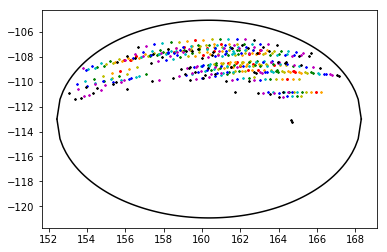

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.-10.,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('84 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_84.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_84.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_84.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 18:38:20
CURRENTLY RUNNING...
34 ray
COMPLETED
total time: ~ 242.0783628662427 mins


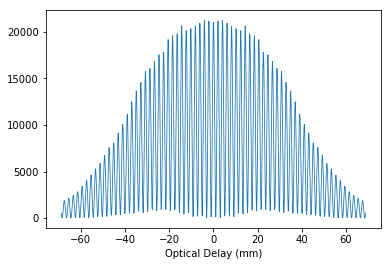

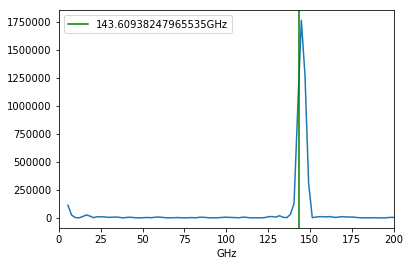

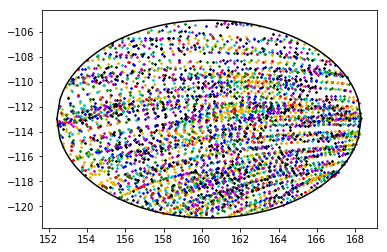

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.+2.5,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('34 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_34.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_34.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_34.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-17 22:44:54
CURRENTLY RUNNING...
24 ray
COMPLETED
total time: ~ 245.18634959459305 mins


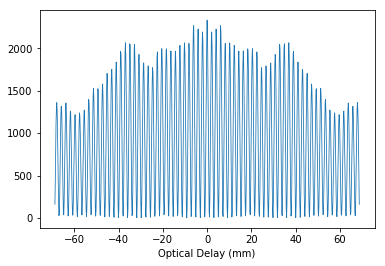

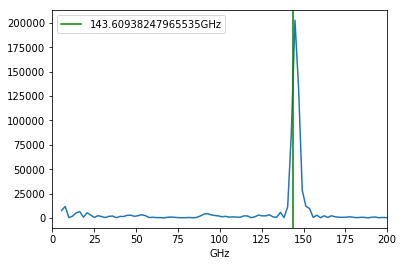

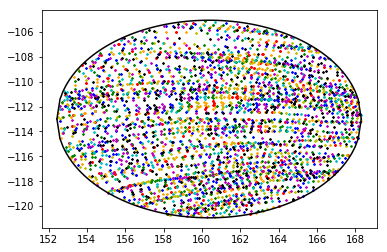

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.+5,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('24 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_24.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_24.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_24.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-18 02:53:17
CURRENTLY RUNNING...
14 ray
COMPLETED
total time: ~ 223.1381337126096 mins


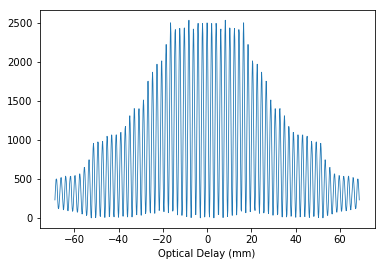

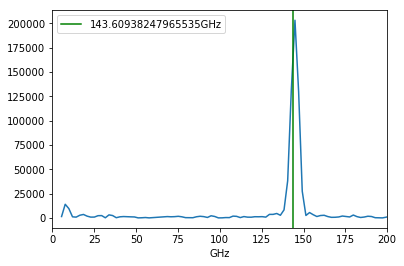

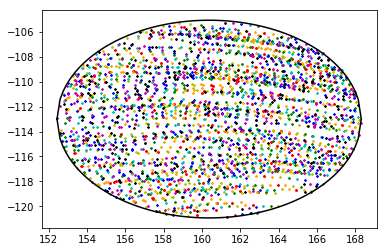

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.+7.5,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('14 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_14.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_14.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_14.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

began:  2019-08-18 06:38:28
CURRENTLY RUNNING...
04 ray
COMPLETED
total time: ~ 145.0034348845482 mins


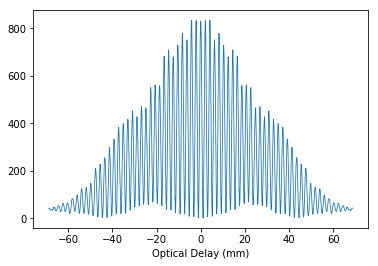

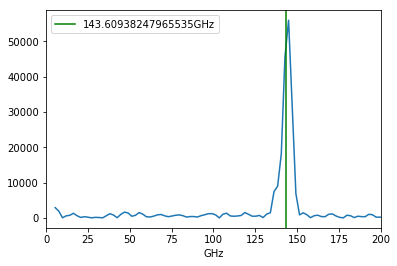

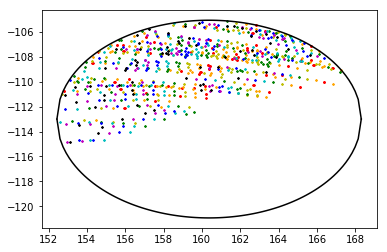

In [ ]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo2 = [-160.375,-113.+10.,-80.0] # moved in y plane
#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees

print('04 ray')
Rays2 = makerays_Zero_narrow_SetShift(spo2,Rays1) #set rays to spo2!
Delay1, Ij1,DET = RunRays_Prob_narrow_SetRays(Lamd,Nsize,spo2,np.pi/9,Rays2)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

with open("Ij_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_04.pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_04.pkl", "wb") as F:
    pickle.dump(Delay1,F)
with open("Det_Chamb_144_Narrow_20_y"+str(spo2[1])+'_'+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "_04.pkl", "wb") as F:
    pickle.dump(DET,F)
    

d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

In [ ]:
# all initial angles are randomly chosen from the same distribution
# polarization is different/randomly chosen each time? 
# find polarization of experimental ray? 
# initial polarization? make the same for all Runs.
# look for where they end up at the detector
# power does decrease the further from center it is launched. so smaller influence!
# make same random distribution?
# AC couple?
# check if polarization is reflected correctly off of input and output mirrors?
# next week! 

with open("500Rays_Narrow_20_"+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Rays1,F)
#saved

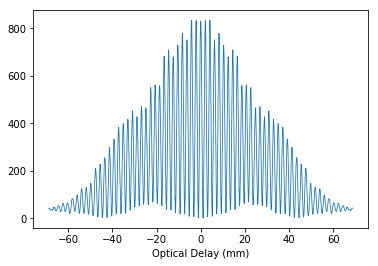

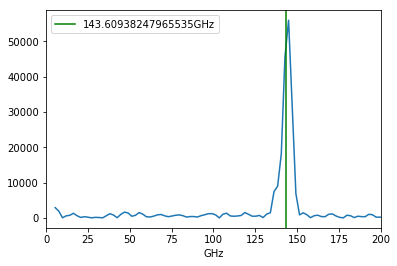

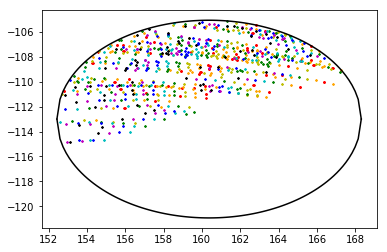

In [26]:
pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()

pl.figure()
colors = ['r','orange','y','g','c','b','m','k']
for i in range(8):
    k = int(Nsize/2)+int((Nsize/16)*i)
    for m in range(len(DET[k])): #A certain mirror position
        pl.scatter(DET[k][m][0],DET[k][m][1],color = colors[i],s=1)
        # x and y coordinates of the kth mirror position and mth ray
pl.plot(xdet,ydetpos,color = 'k')
pl.plot(xdet,ydetneg,color = 'k')
pl.show()        

# playing with ac coupling by cutting off low frequence in k space

In [82]:
with open('Ij_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Ij2 = pickle.load(F)
with open('Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)

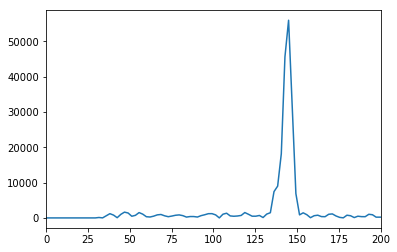

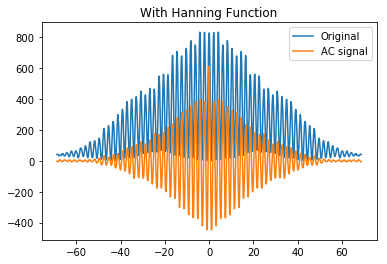

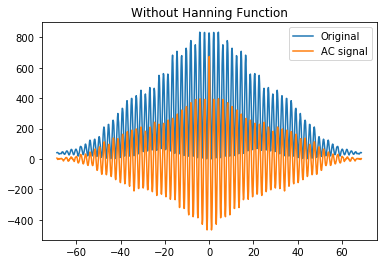

In [89]:
d2 = Ij2
D2 = np.hanning(int(np.shape(d2)[0]))*d2
S2 = np.fft.rfft(D2)
u2 = np.abs(S2)


A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
pl.plot(A,B)
pl.xlim(0,200)
pl.show()

ifX = np.fft.fftshift(np.fft.irfft(B))
pl.title('With Hanning Function')
pl.plot(Delay2,Ij2,label = 'Original')
pl.plot(Delay2,ifX,label = 'AC signal')
pl.legend()

pl.show()


S2 = np.fft.rfft(Ij2[:])
u2 = np.abs(S2)
A = 300*f[:]
B = u2
for i in range(len(A)):
    if A[i]<=30:
        B[i]=0
        
ifX = np.fft.fftshift(np.fft.irfft(B))
pl.title('Without Hanning Function')
pl.plot(Delay2,Ij2,label = 'Original')
pl.plot(Delay2,ifX,label = 'AC signal')
pl.legend()

pl.show()